# Lab 05

### Name：Xinyu Chang

In [8]:
# import the packages
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

### 1 Boston Housing Data

#### 1. load file boston.csv and ensure the file loaded good

In [9]:
df = pd.read_csv("boston.csv.bz2", sep="\t")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
df.shape

(506, 14)

There are 506 rows(observations) and 14 columns(variables) in the dataset.

### 2 Simple Regression

#### 1. Let’s start the average house size (rm: average number of rooms). Do the following:  
#### (a) run the linear regression in the form medvi = β0 + β1 · rmi + ϵi and show the regression output.

In [11]:
m = smf.ols("medv ~ rm", data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 03 May 2023   Prob (F-statistic):           2.49e-74
Time:                        00:20:53   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (b) interpret the coefficients (β0 and β1). What do these numbers mean? Are these statistically significant?

From the table, we can know that:  

The Intercept is -34.6706 with a p-value of 0.000(less than 0.05), which is statistically significant at a 95% confidence level. This suggests that when the average number of rooms per dwelling (rm) is zero, the predicted median value of owner-occupied homes (medv) is -34.6706(USD dollars). However, this interpretation does not make sense practically, as it is impossible to have a dwelling with zero rooms.

The rm coefficient is 9.1021 with a p-value of 0.000(less than 0.05), which is statistically significant at a 95% confidence level. This means that, on average, for each additional room in a dwelling, the median value of owner-occupied homes (medv) is expected to increase by 9.1021(USD dollars).

#### (c) What do you think, why is the intercept negative? Does it tell us anything about house prices?

If the intercept is negative, it indicates that the predicted median value of owner-occupied residences (medvi) would be negative when the average number of rooms per domicile is zero (rm = 0). It is inconceivable for a residence to have zero chambers in the actual world. Consequently, a negative intercept in this context might not be interpretable. However, the sign of the intercept does not inherently influence the aggregate correlation between the number of rooms and house prices. Focus on the positive and significant slope, which indicates that house prices increase with the average number of rooms per dwelling, as that relationship is more relevant and informative.

#### (d)Try to think about what do these numbers tell about the city and society. Remember: this is not about house price versus house size, this is neighborhood’s median house price versus neighborhood’s average house size.Try to think in terms of poor and rich neighborhoods!

These figures suggest that there is a correlation between the average house size (as measured by the average number of rooms per residence) and the median house price in a neighborhood. This suggests that larger homes tend to be found in neighborhoods with higher median house prices.This relationship could suggest the following in terms of impoverished and wealthy neighborhoods.Richer neighborhoods typically feature larger residences with more rooms. Consequently, both the average number of rooms per domicile and the median house price have increased. Richer neighborhoods typically provide superior amenities, access to quality education, lower crime rates, and well-kept public spaces, all of which contribute to their higher property values.In contrast, homes in impoverished communities are typically smaller and have fewer rooms, resulting in a lower average number of rooms per dwelling. The median home price is also lower in these communities. It is possible that factors such as limited access to quality education, increased crime rates, and inadequate public services contributed to the decrease in property values.The positive correlation between neighborhood's average house size and median house price may reflect the city's wealth inequality and distribution. It emphasizes the socioeconomic differences between communities, where larger homes in more affluent areas command higher prices and smaller homes in less affluent areas command lower prices.

#### (e) create a plot of medv (vertical) versus rm (horizontal)

#### (f) add your regression line on the plot.

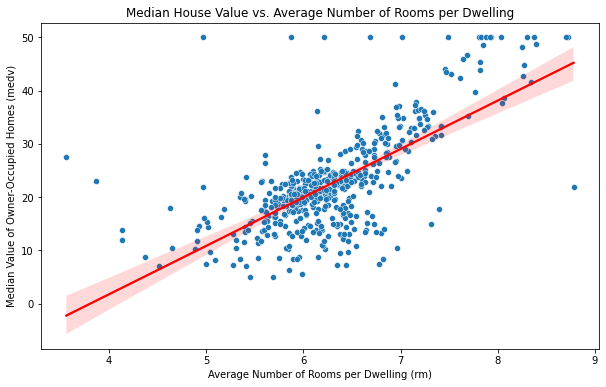

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rm', y='medv', data=df)
sns.regplot(x='rm', y='medv', data=df, scatter=False, line_kws={'color': 'red'})
plt.xlabel('Average Number of Rooms per Dwelling (rm)')
plt.ylabel('Median Value of Owner-Occupied Homes (medv)')
plt.title('Median House Value vs. Average Number of Rooms per Dwelling')
plt.show()

The regression line is upward sloping, indicating a positive relationship between the average number of rooms per dwelling (rm) and the median value of owner-occupied homes (medv).

The dots in the scatter plot is generally trend upward, similar to the regression line. This means that as the average number of rooms per dwelling (rm) increases, the median value of owner-occupied homes (medv) also tends to increase. It is noticeable that most of the dots focus on the range of 5-7 of the average number of rooms per dwelling, and the correspond median value of owener-occupied homes is about 10-40. However, there are some deviations from this trend, as other factors may influence house values.

#### 2. Now repeat the above with age

#### Do the following:(a) run the linear regression in the form medvi = β0 + β1 · age + ϵi and show the regression output.

In [27]:
m2 = smf.ols("medv ~ age", data=df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.57e-18
Time:                        19:44:31   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.000      29.016      32.942
age           -0.1232      0.013     -9.137      0.000      -0.150      -0.097
==============================================================================
Omnibus:                      170.034   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.983
Skew:                           1.671   Prob(JB):                    5.85e-100
Kurtosis:                       6.240   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (b) interpret the coefficients (β0 and β1). What do these numbers mean? Are these statistically significant?

This OLS regression analysis investigates the relationship between the median value of owner-occupied homes (medv) and the proportion of owner-occupied units built before 1940 (age).The intercept (β0) is 30.9787 with a p-value of 0.000(less than 0.05), which is statistically significant at a 95% confidence level. This suggests that when the proportion of owner-occupied units built before 1940 (age) is zero, the predicted median value of owner-occupied homes (medv) is 30.9787(USD dollars). However, it's important to note that having zero proportion of units built before 1940 might not be a practical scenario in real-world neighborhoods. The Age coefficient (β1) is -0.1232 with a p-value of 0.000(less than 0.05), which is statistically significant at a 95% confidence level. This means that, on average, for each additional 1% increase in the proportion of owner-occupied units built before 1940 (age), the median value of owner-occupied homes (medv) is expected to decrease by -0.1232(USD dollars). This indicates that neighborhoods with a higher proportion of older houses tend to have lower median house values.

#### (c) What do you think, why is the slope negative? Does it tell us anything about house prices?

The negative coefficient for the proportion of owner-occupied units built before 1940 (age) in the regression model suggests that there is a negative relationship between the age of the houses and the median value of owner-occupied homes (medv). This means that as the proportion of older houses in a neighborhood increases, the median house value in that neighborhood tends to decrease.

#### (d) Try to think about what do these numbers tell about the city and society. Remember: this is not about house price versus house size, this is neighborhood’s median house price versus neighborhood’s average house size.Try to think in terms of poor and rich neighborhoods!

The results of the OLS regression indicate that neighborhoods with a greater proportion of elder homes tend to have lower median home values. This may be indicative of socioeconomic disparities between the city's impoverished and wealthy communities.There may be a greater proportion of older houses in poorer communities, which may be in poorer condition due to a lack of maintenance and renovations. These homes may have outmoded designs and amenities, resulting in a decrease in demand and, consequently, a decrease in home prices in these areas.

#### (e) create a plot of medv (vertical) versus rm (horizontal)

#### (f) add your regression line on the plot.

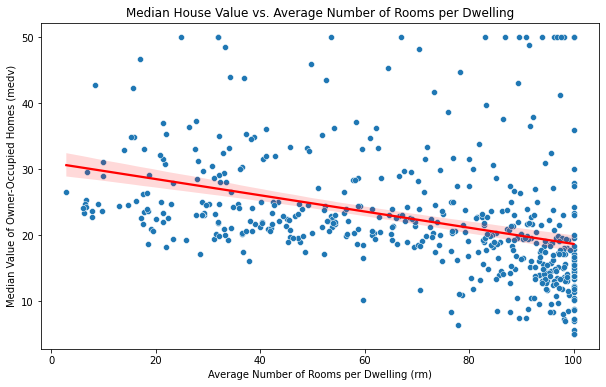

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='medv', data=df)
sns.regplot(x='age', y='medv', data=df, scatter=False, line_kws={'color': 'red'})
plt.xlabel('Average Number of Rooms per Dwelling (rm)')
plt.ylabel('Median Value of Owner-Occupied Homes (medv)')
plt.title('Median House Value vs. Average Number of Rooms per Dwelling')
plt.show()

The regression line has a downward sloping, indicating a negative relationship between the proportion of owner-occupied units built before 1940 (age) and the median value of owner-occupied homes (medv).

The dots in the scatter plot has a trend downward, similar to the regression line. This means that as the proportion of owner-occupied units built before 1940 (age) increases, the median value of owner-occupied homes (medv) tends to decrease. However, we can observe some deviations from this trend, as other factors may influence house values.

### 3  Multiple regression

#### 1. Now use multiple regression to estimate the relationship between median house price and the neighborhood characteristics. Include all variables (except medv) as the explanatory variables. Print the output.

In [16]:
m2 = smf.ols("medv ~ crim + zn + indus + chas + nox + rm + age + \
             dis + rad + tax+ ptratio + black + lstat", data=df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 03 May 2023   Prob (F-statistic):          6.72e-135
Time:                        01:40:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2. Interpret the results for rm and age, the same two variables your used above.

rm (average number of rooms per dwelling) has a coefficient of 3.8099, standard error of 0.418, t-statistic of 9.116, p-value of 0.000 (less than 0.05).The p-value of 0.000 for rm is statistically significant (p-value < 0.05). This indicates that, holding all other variables constant, an additional room in a dwelling is associated with an increase of approximately 3.8099(USD dollars) in the median value of owner-occupied homes (medv) in the neighborhood.

age (proportion of owner-occupied units built before 1940) has a coefficient of 0.0007, standard error of 0.013, t-statistic of 0.052,
p-value of 0.958 (greater than 0.05).The p-value of 0.985 for age is not statistically significant (p-value > 0.05). This indicates that when controlling for all other variables in the model, the proportion of owner-occupied units built before 1940 does not have a significant effect on the median value of owner-occupied homes (medv) in the neighborhood.

#### 3. Explain why age is now essentially 0, while it was -0.12 and highly statistically significant in Q 2. 2. Does it tell you something about how house prices are determined?

The change in the coefficient and significance of age between the simple linear regression and multiple regression models is due to the inclusion of additional variables. In the multiple regression model, when accounting for these factors, age no longer has a significant impact on house prices. This highlights the importance of considering multiple factors when analyzing complex relationships like house price determination.